# Подготовка набора данных

Подготовка библиотек и отключение предупреждений

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="ticks")

Подключение Google Drive к блокноту Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка набора данных

Набор данных, используемый в лабораторных работах доступен по [ссылке](https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification)

Поскольку работы выполнены в среде Google Colaboratory, путь до файла указывается относительно директории, к которой примонтирован Google диск

In [3]:
path_to_csv = '/content/drive/MyDrive/ParisHousingClass.csv'
np_file_args = {'encoding': 'utf-8', 'delimiter': ','}

Первый способ считывания CSV-датасета с использованием _**NumPy**_. Общие для всех способов параметры кодировки файла и разделителя `,` переданы с использованием словаря `np_file_args`

In [4]:
data = np.genfromtxt(path_to_csv, **np_file_args)
print(data)

[[          nan           nan           nan ...           nan
            nan           nan]
 [7.5523000e+04 3.0000000e+00 0.0000000e+00 ... 7.0000000e+00
  7.5590815e+06           nan]
 [8.0771000e+04 3.9000000e+01 1.0000000e+00 ... 2.0000000e+00
  8.0859895e+06           nan]
 ...
 [8.3841000e+04 3.0000000e+00 0.0000000e+00 ... 9.0000000e+00
  8.3900305e+06           nan]
 [5.9036000e+04 7.0000000e+01 0.0000000e+00 ... 4.0000000e+00
  5.9051070e+06           nan]
 [1.4400000e+03 8.4000000e+01 0.0000000e+00 ... 6.0000000e+00
  1.4670840e+05           nan]]


In [5]:
print("Тип переменной data:", type(data))
print("Размеры матрицы с данными:", data.shape)
print("Первые пять строк матрицы:")
print(data[:5])

Тип переменной data: <class 'numpy.ndarray'>
Размеры матрицы с данными: (10001, 18)
Первые пять строк матрицы:
[[          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan]
 [7.5523000e+04 3.0000000e+00 0.0000000e+00 1.0000000e+00 6.3000000e+01
  9.3730000e+03 3.0000000e+00 8.0000000e+00 2.0050000e+03 0.0000000e+00
  1.0000000e+00 4.3130000e+03 9.0050000e+03 9.5600000e+02 0.0000000e+00
  7.0000000e+00 7.5590815e+06           nan]
 [8.0771000e+04 3.9000000e+01 1.0000000e+00 1.0000000e+00 9.8000000e+01
  3.9381000e+04 8.0000000e+00 6.0000000e+00 2.0150000e+03 1.0000000e+00
  0.0000000e+00 3.6530000e+03 2.4360000e+03 1.2800000e+02 1.0000000e+00
  2.0000000e+00 8.0859895e+06           nan]
 [5.5712000e+04 5.8000000e+01 0.0000000e+00 1.0000000e+00 1.9000000e+01
  3.4457000e+04 6.0000000e+00 8.00

Второй способ считывания CSV-датасета с использованием _**NumPy**_. Параметр типов данных обнулен

Также, заметим, что первая строка матрицы не была успешно считана, в ней должны были содержаться названия столбцов. Будем пропускать эту строку при работе с _**NumPy**_

In [6]:
data = np.genfromtxt(path_to_csv, dtype=None, **np_file_args)

data = data[1:] # Удалим первую строку с заголовком
print(data.shape)

(10000, 18)


In [7]:
print(type(data))
print(type(data[0]))
print(type(data[0][-1])) # Последняя колонка с целевыми значениями
print(data[:10])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.str_'>
[['75523' '3' '0' '1' '63' '9373' '3' '8' '2005' '0' '1' '4313' '9005'
  '956' '0' '7' '7559081.5' 'Basic']
 ['80771' '39' '1' '1' '98' '39381' '8' '6' '2015' '1' '0' '3653' '2436'
  '128' '1' '2' '8085989.5' 'Luxury']
 ['55712' '58' '0' '1' '19' '34457' '6' '8' '2021' '0' '0' '2937' '8852'
  '135' '1' '9' '5574642.1' 'Basic']
 ['32316' '47' '0' '0' '6' '27939' '10' '4' '2012' '0' '1' '659' '7141'
  '359' '0' '3' '3232561.2' 'Basic']
 ['70429' '19' '1' '1' '90' '38045' '3' '7' '1990' '1' '0' '8435' '2429'
  '292' '1' '4' '7055052' 'Luxury']
 ['39223' '36' '0' '1' '17' '39489' '8' '6' '2012' '0' '1' '2009' '4552'
  '757' '0' '1' '3926647.2' 'Basic']
 ['58682' '10' '1' '1' '99' '6450' '10' '9' '1995' '1' '1' '5930' '9453'
  '848' '0' '5' '5876376.5' 'Luxury']
 ['86929' '100' '1' '0' '11' '98155' '3' '4' '2003' '1' '0' '6326' '4748'
  '654' '0' '10' '8696869.3' 'Basic']
 ['51522' '3' '0' '0' '61' '9047' '8' '3' '2012' '1

Третий способ считывания CSV-датасета с использованием _**NumPy**_. Параметр типов данных генерируется и устанавливается. Заранее известно, что первые 17 колонок являются числовыми, а колонка с типом дома - строкой `Basic` или `Luxury`, длина которой по итогу не превышает 6 байт

In [8]:
col_types = ['f8'] * 17 + ['U6']
col_types = ', '.join(col_types)
print("Переданный тип данных в наборе:", col_types)

dt = np.dtype(col_types)
data = np.genfromtxt(path_to_csv, dtype=dt, **np_file_args)

data = data[1:] # Удалим первую строку с заголовком
print(data.shape)

Переданный тип данных в наборе: f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, f8, U6
(10000,)


In [9]:
print(type(data))
print(type(data[0]))
print(type(data[0][-1])) # Последняя колонка с целевыми значениями
print(data[:10])

<class 'numpy.ndarray'>
<class 'numpy.void'>
<class 'numpy.str_'>
[(75523.,   3., 0., 1., 63.,  9373.,  3., 8., 2005., 0., 1., 4313., 9005., 956., 0.,  7., 7559081.5, 'Basic')
 (80771.,  39., 1., 1., 98., 39381.,  8., 6., 2015., 1., 0., 3653., 2436., 128., 1.,  2., 8085989.5, 'Luxury')
 (55712.,  58., 0., 1., 19., 34457.,  6., 8., 2021., 0., 0., 2937., 8852., 135., 1.,  9., 5574642.1, 'Basic')
 (32316.,  47., 0., 0.,  6., 27939., 10., 4., 2012., 0., 1.,  659., 7141., 359., 0.,  3., 3232561.2, 'Basic')
 (70429.,  19., 1., 1., 90., 38045.,  3., 7., 1990., 1., 0., 8435., 2429., 292., 1.,  4., 7055052. , 'Luxury')
 (39223.,  36., 0., 1., 17., 39489.,  8., 6., 2012., 0., 1., 2009., 4552., 757., 0.,  1., 3926647.2, 'Basic')
 (58682.,  10., 1., 1., 99.,  6450., 10., 9., 1995., 1., 1., 5930., 9453., 848., 0.,  5., 5876376.5, 'Luxury')
 (86929., 100., 1., 0., 11., 98155.,  3., 4., 2003., 1., 0., 6326., 4748., 654., 0., 10., 8696869.3, 'Basic')
 (51522.,   3., 0., 0., 61.,  9047.,  8., 3., 2012.

# Графическое представление

Начнем с использования _**Pandas**_ для чтения, и обработки набора данных

In [10]:
ParisHousingClass_df = pd.read_csv(path_to_csv)
ParisHousingClass_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## Простейший анализ данных по графическому представлению

In [11]:
# Не будем отображать 10000 точек, возьмем 500 случайных из каждого класса
luxury_data = ParisHousingClass_df[ParisHousingClass_df.category == 'Luxury'].sample(250)
basic_data = ParisHousingClass_df[ParisHousingClass_df.category == 'Basic'].sample(250)

luxury_data.shape, basic_data.shape

((250, 18), (250, 18))

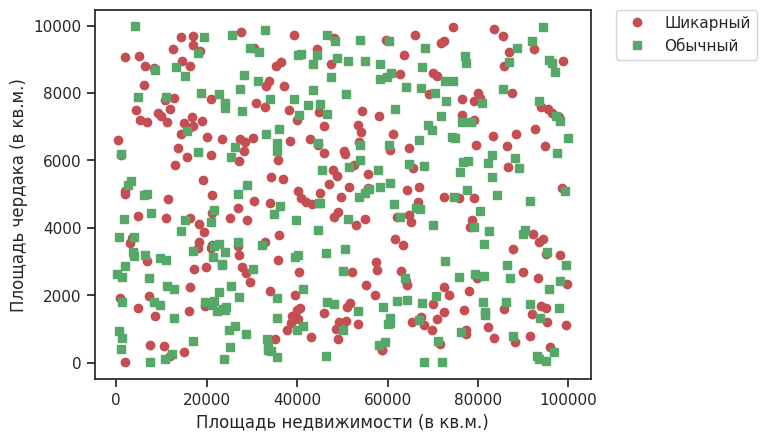

In [12]:
plt.figure(1)
plt.plot(luxury_data["squareMeters"], luxury_data["attic"], 'ro', label='Шикарный')
plt.plot(basic_data["squareMeters"], basic_data["attic"], 'gs', label='Обычный')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Площадь недвижимости (в кв.м.)')
plt.ylabel('Площадь чердака (в кв.м.)')

plt.show()

Визуально, корреляция между площадью недвижимости и площадью чердака отсутствует. Их зависимость не оказывает видимого влияния на присвоенную категорию

## Построение графиков для отображения различных проекций данных

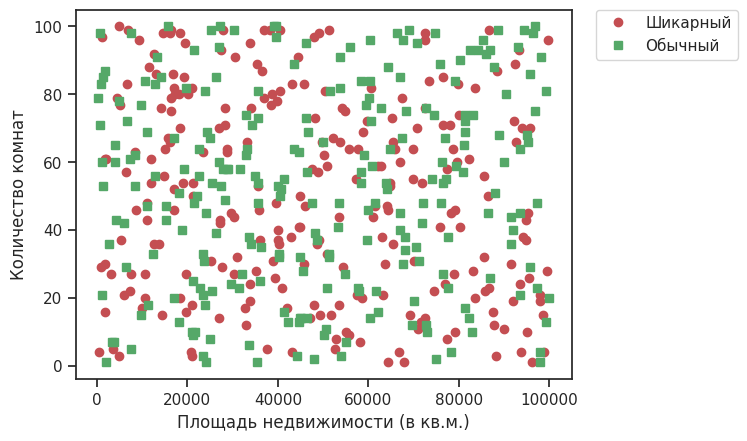

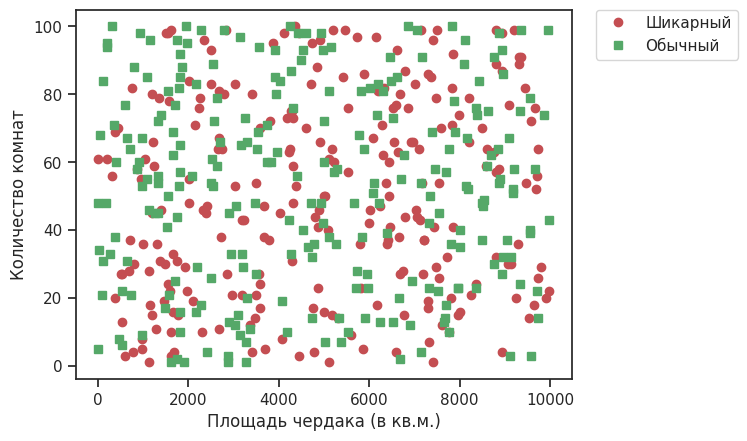

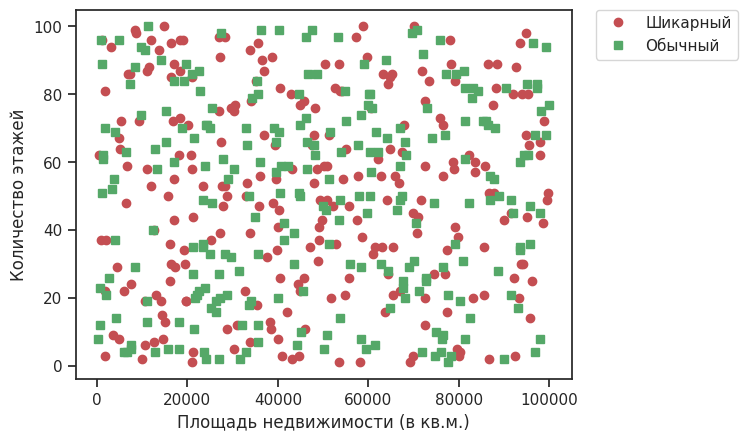

In [13]:
plt.figure(1)
plt.plot(luxury_data["squareMeters"], luxury_data["numberOfRooms"], 'ro', label='Шикарный')
plt.plot(basic_data["squareMeters"], basic_data["numberOfRooms"], 'gs', label='Обычный')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Площадь недвижимости (в кв.м.)')
plt.ylabel('Количество комнат')

plt.figure(2)
plt.plot(luxury_data["attic"], luxury_data["numberOfRooms"], 'ro', label='Шикарный')
plt.plot(basic_data["attic"], basic_data["numberOfRooms"], 'gs', label='Обычный')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Площадь чердака (в кв.м.)')
plt.ylabel('Количество комнат')

plt.figure(3)
plt.plot(luxury_data["squareMeters"], luxury_data["floors"], 'ro', label='Шикарный')
plt.plot(basic_data["squareMeters"], basic_data["floors"], 'gs', label='Обычный')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Площадь недвижимости (в кв.м.)')
plt.ylabel('Количество этажей')

plt.show()

Построение аналогичных графиков для данных о площади недвижимости, количестве комнат и этажей показало отсутствие влияния на присвоенную категорию дома, а также огсутствие корреляции между представленными данными.